In [45]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np
#import pgeocode as pg
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [6]:
zipcodes = gpd.read_file('data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [7]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

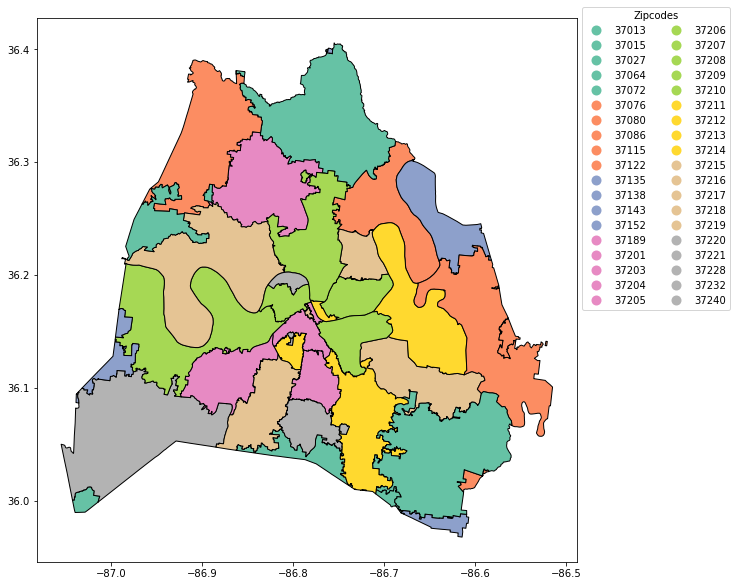

In [8]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [18]:
V_protocol = pd.read_csv('data/vaccine_with_protocol.csv')
print(V_protocol.shape)
V_protocol.head( )

(6694, 5)


,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [19]:
V_protocol.tail()

,vacc_date,zipcode,count_given,dose_nbr,protocol
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6690,2021-04-07,37228.0,2.0,2.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot
6692,2021-04-07,NaN,1.0,1.0,one-shot
6693,2021-04-07,NaN,7.0,2.0,two-shot


In [20]:
#checking if any thing is null
V_protocol.isnull().sum() 

vacc_date        0
zipcode        232
count_given      8
dose_nbr         8
protocol         0
dtype: int64

In [21]:
V_protocol.protocol.value_counts()

two-shot    5960
one-shot     734
Name: protocol, dtype: int64

In [44]:
V_protocol

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215,1.0,1.0,two-shot
1,2020-12-14,37205,1.0,2.0,two-shot
2,2020-12-14,37215,1.0,1.0,two-shot
3,2020-12-15,37221,1.0,1.0,two-shot
4,2020-12-16,37215,1.0,1.0,two-shot
...,...,...,...,...,...
6689,2021-04-07,37228,9.0,1.0,two-shot
6690,2021-04-07,37228,2.0,2.0,two-shot
6691,2021-04-07,<NA>,8.0,1.0,two-shot
6692,2021-04-07,<NA>,1.0,1.0,one-shot


In [24]:
#filling in 'NA' with 0
#V_protocol=V_protocol.fillna(0)
#changing zipcode, count, dose to integers
#V_protocol=V_protocol.astype({'zipcode':int,'count_given':int,'dose_nbr':int})
#V_protocol

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215,1,1,two-shot
1,2020-12-14,37205,1,2,two-shot
2,2020-12-14,37215,1,1,two-shot
3,2020-12-15,37221,1,1,two-shot
4,2020-12-16,37215,1,1,two-shot
...,...,...,...,...,...
6689,2021-04-07,37228,9,1,two-shot
6690,2021-04-07,37228,2,2,two-shot
6691,2021-04-07,0,8,1,two-shot
6692,2021-04-07,0,1,1,one-shot


In [16]:
C_count = pd.read_csv('data/COVID_CountByZipPerDate 03292021.csv')
print(C_count.shape)
C_count.head( )

(8832, 3)


,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [6]:
C_count.tail()

,Specimen Collection Date,Zip,Cases
8827,3/27/2021,37210.0,1
8828,3/27/2021,37211.0,1
8829,3/27/2021,37212.0,1
8830,3/27/2021,37214.0,2
8831,3/27/2021,37221.0,2


In [33]:
C_count.dtypes

Specimen Collection Date    object
Zip                          int32
Cases                        int64
dtype: object

In [22]:
#checking if any thing is null
C_count.isnull().sum() 

Specimen Collection Date      0
Zip                         376
Cases                         0
dtype: int64

In [23]:
#changing zip to int then to str
C_count.Zip = C_count.Zip.astype('Int64')
V_protocol.zipcode = V_protocol.zipcode.astype('Int64')


In [27]:
C_count.Zip = C_count.Zip.astype('str')
V_protocol.zipcode = V_protocol.zipcode.astype('str')


vacc_date       object
zipcode         object
count_given    float64
dose_nbr       float64
protocol        object
dtype: object

In [35]:
V_protocol.dtypes

vacc_date       object
zipcode         object
count_given    float64
dose_nbr       float64
protocol        object
dtype: object

In [28]:
C_count.dtypes

Specimen Collection Date    object
Zip                         object
Cases                        int64
dtype: object

In [36]:
#groupby zip
V_protocol_by_zip = V_protocol.groupby('zipcode')
C_count_by_zip = C_count.groupby('Zip')


In [37]:
V_protocol.describe()

,count_given,dose_nbr
count,6686.000000,6686.000000
mean,50.088244,1.406671
std,62.626506,0.491249
min,1.000000,1.000000
25%,7.000000,1.000000
50%,28.000000,1.000000
75%,69.000000,2.000000
max,622.000000,2.000000


In [33]:
C_count.describe()

,Cases
count,8832.000000
mean,10.599977
std,15.487583
min,1.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,272.000000


In [32]:
#filling in 'NA' with 0
#C_count=C_count.fillna(0)
#changing zipcode to integers
#C_count=C_count.astype({'Zip':int})

#C_count

(8832, 3)


,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217,1
1,3/10/2020,37214,1
2,3/11/2020,37013,1
3,3/11/2020,37204,2
4,3/11/2020,37205,1
...,...,...,...
8827,3/27/2021,37210,1
8828,3/27/2021,37211,1
8829,3/27/2021,37212,1
8830,3/27/2021,37214,2


In [10]:
#FINDING DUPLICATE VALUES
duplicate_rows_df = V_protocol[V_protocol.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [38]:
duplicate_rows_df2 = C_count[C_count.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df2.shape)

number of duplicate rows:  (0, 3)


In [11]:
#FINDING NULL VALUES
print(V_protocol.isnull().sum())

vacc_date        0
zipcode        232
count_given      8
dose_nbr         8
protocol         0
dtype: int64


In [47]:
#finding distinct zipcodes
C_count.Zip.nunique()  #name is column name, can use .column or ['column name']

32

In [39]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(C_count);

NameError: name 'sns' is not defined

In [ ]:
#creat a geoframe out of V_protocol and C_count
V_protocol['geometry'] = bus_stops.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
bus_stops.head(3)

In [63]:
#cases_by_zip=C_count.groupby('Zip')['Cases'].count()

In [65]:
print(C_count)

     Specimen Collection Date    Zip  Cases
0                    3/6/2020  37217      1
1                   3/10/2020  37214      1
2                   3/11/2020  37013      1
3                   3/11/2020  37204      2
4                   3/11/2020  37205      1
...                       ...    ...    ...
8827                3/27/2021  37210      1
8828                3/27/2021  37211      1
8829                3/27/2021  37212      1
8830                3/27/2021  37214      2
8831                3/27/2021  37221      2

[8832 rows x 3 columns]


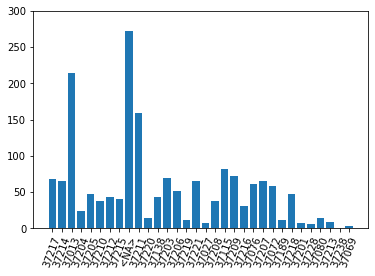

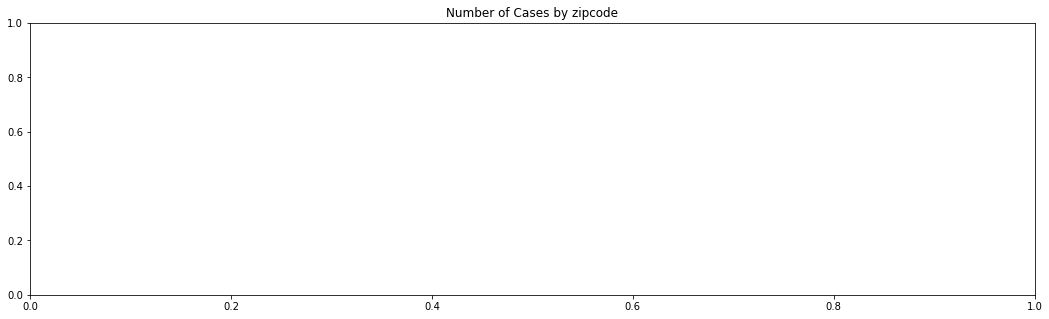

In [64]:
plt.ylim(0,300)
plt.bar('Zip', 'Cases', data = C_count)
plt.xticks(rotation = 70)
f, ax = plt.subplots(figsize=(18,5))
#plt.figure(figsize=(10, 6))
plt.title('Number of Cases by zipcode');

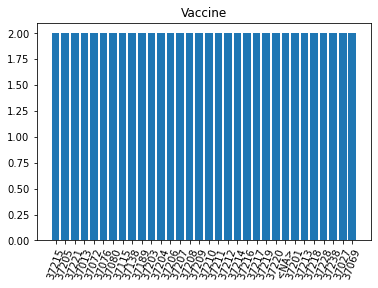

In [52]:
plt.bar('zipcode', 'dose_nbr', data = V_protocol)
plt.xticks(rotation = 70)
plt.title('Vaccine');